In [1]:

#1 Data Analysis and Visualization

#import pandas as pd          # Data manipulation and analysis
#import seaborn as sns       # Statistical data visualization
#import matplotlib.pyplot as plt  # Plotting library
#%matplotlib inline          # Display plots in Jupyter notebook

#2 Machine Learning Models

#from sklearn.ensemble import RandomForestClassifier  # Tree-based ensemble model
#from sklearn.svm import SVC                         # Support Vector Classification

#3 Model Evaluation Tools

#from sklearn.metrics import (
    #confusion_matrix,       # Shows prediction errors per class
    #classification_report,  # Detailed classification metrics
    #accuracy_score         # Overall prediction accuracy
#)

#4 Data Preprocessing

#from sklearn.preprocessing import (
    #StandardScaler,        # Feature scaling to standard normal distribution
    #LabelEncoder          # Convert categorical labels to numbers
#)

#5 Model Training and Validation

#from sklearn.model_selection import (
    #train_test_split,     # Split data into train/test sets
    #GridSearchCV,         # Hyperparameter optimization
    #cross_val_score      # K-fold cross validation
#)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
# Load wine quality dataset from CSV file
# Contains various wine features and quality ratings
#wine = pd.read_csv('data.csv')

# Display first few rows of dataset
# Shows:
# - Basic structure
# - Column names
# - Data types
# - Initial values
#wine

wine = pd.read_csv('data.csv')
wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: xlabel='quality', ylabel='fixed acidity'>

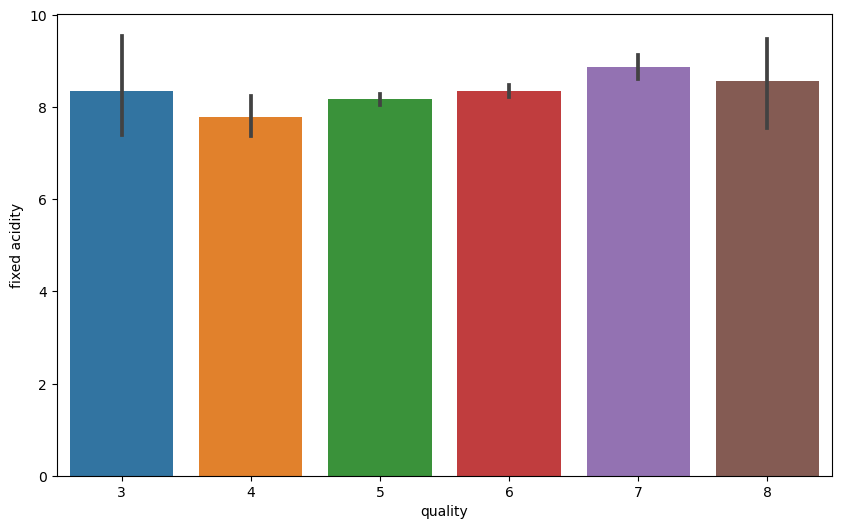

In [3]:
# Create visualization of wine quality vs fixed acidity
# Parameters:
# - figure size: 10x6 inches for better readability
# - x-axis: wine quality ratings
# - y-axis: fixed acidity levels
# - data source: wine DataFrame
#fig = plt.figure(figsize = (10,6))
#sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

# Resulting plot shows:
# - Average fixed acidity for each quality level
# - Error bars indicating variance
# - Distribution of acidity across quality ratings

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

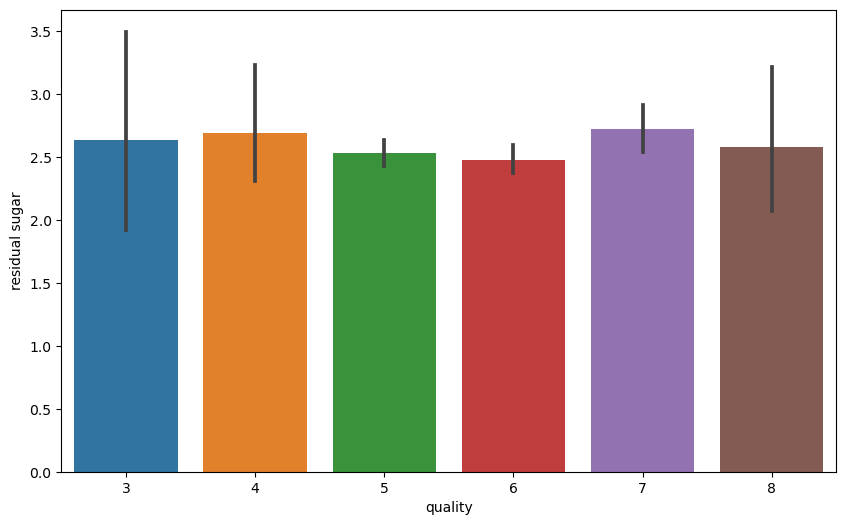

In [4]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

In [5]:
# Convert wine quality scores into binary categories
# bins:
# - 2 to 6.5: classified as 'bad'
# - 6.5 to 8: classified as 'good'
#bins = (2, 6.5, 8)                # Define bin edges
#group_names = ['bad', 'good']     # Define category labels
#wine['quality'] = pd.cut(wine['quality'], 
#                        bins = bins,           # Bin boundaries
#                        labels = group_names)  # Category names

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [6]:
# Display quality distribution after binning
# Shows:
# - Binary categories (bad/good)
# - Number of samples in each category
# - Data type (categorical)
#wine['quality']    # Display transformed quality column

wine['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [7]:
# Initialize LabelEncoder for quality categories
# Converts:
# 'bad' -> 0
# 'good' -> 1
#label_quality = LabelEncoder()

label_quality = LabelEncoder()

In [8]:
# Convert categorical quality labels to numeric values
# fit_transform: learns mapping and applies transformation
#wine['quality'] = label_quality.fit_transform(wine['quality'])

# Display count of samples in each class
# Shows:
# 0 (bad) -> count
# 1 (good) -> count
#wine['quality'].value_counts()

wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [9]:
# Split data into features (X) and target (y)
#X = wine.drop('quality', axis = 1)    # All columns except 'quality'
                                      # axis=1 means drop column
                                      # Contains all wine properties

#y = wine['quality']                   # Target variable
                                     # Binary encoded (0: bad, 1: good)
                                     # Used for model training

X = wine.drop('quality', axis = 1)
y = wine['quality']

In [10]:
# Split dataset into training and testing sets
# Parameters:
# - X: feature matrix
# - y: target vector
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: seed for reproducible splits
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                   test_size=0.2, 
#                                                   random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
# Initialize StandardScaler for feature normalization
# Standardizes features by removing mean and scaling to unit variance
#sc = StandardScaler()

# Fit scaler to training data and transform it
# z = (x - mean) / std_dev
#X_train = sc.fit_transform(X_train)

# Transform test data using fitted scaler
# Use same scaling parameters as training data
#X_test = sc.transform(X_test)  # Note: only transform, not fit_transform

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
# Initialize Random Forest Classifier
# - n_estimators=200: number of trees in forest
# Higher number = more robust, but slower
#rfc = RandomForestClassifier(n_estimators=200)

# Train Random Forest model
# X_train: standardized features
# y_train: binary quality labels (0/1)
#rfc.fit(X_train, y_train)

# Make predictions on test set
# Returns binary predictions (0: bad, 1: good)
#pred_rfc = rfc.predict(X_test)

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [13]:
# Print Random Forest model performance metrics
#print("Accuaracy score =",accuracy_score(y_test, pred_rfc))  # Overall accuracy

# Display detailed classification report
# Shows:
# - Precision: true positives / (true + false positives)
# - Recall: true positives / (true + false negatives)
# - F1-score: harmonic mean of precision and recall
# - Support: number of samples per class
#print(classification_report(y_test, pred_rfc))

print("Accuaracy score =",accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))


Accuaracy score = 0.8875
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.70      0.40      0.51        47

    accuracy                           0.89       320
   macro avg       0.80      0.69      0.72       320
weighted avg       0.87      0.89      0.87       320



In [14]:
# Initialize Support Vector Machine Classifier
# Default parameters:
# - kernel='rbf' (Radial Basis Function)
# - C=1.0 (Regularization parameter)
#svc = SVC()

# Train SVM model on standardized data
# X_train: scaled features
# y_train: binary labels
#svc.fit(X_train, y_train)

# Generate predictions on test set
# Returns binary classification (0: bad, 1: good)
#pred_svc = svc.predict(X_test)

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [15]:
# Print Support Vector Machine performance metrics
# Overall accuracy as percentage of correct predictions
#print("Accuaracy score =",accuracy_score(y_test, pred_svc))

# Detailed performance metrics per class
# Shows precision, recall, F1-score and support
# Useful for comparing model performance with Random Forest
#print(classification_report(y_test, pred_svc))

print("Accuaracy score =",accuracy_score(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

Accuaracy score = 0.875
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [16]:

# Define parameter grid for SVM optimization
# Parameters to tune:
# C: Regularization parameter (8 values)
# kernel: Linear vs RBF kernel
# gamma: Kernel coefficient (8 values)
#param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],      # Controls margin size
    'kernel':['linear', 'rbf'],                  # Kernel type
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]    # RBF kernel parameter
}

# Initialize GridSearchCV
# - cv=10: 10-fold cross-validation
# - verbose=2: detailed output during fitting
# Total combinations = 8 (C) * 2 (kernel) * 8 (gamma) = 128
#grid_svc = GridSearchCV(svc, param, cv=10, verbose=2)

param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

grid_svc = GridSearchCV(svc,param, cv=10, verbose=2)

In [17]:
# Train SVM with GridSearchCV
# Process:
# - Tests 128 parameter combinations
# - 10-fold cross-validation for each combination
# - Total fits = 128 * 10 = 1280
# - May take several minutes to complete
#grid_svc.fit(X_train, y_train)

grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [18]:
# Make predictions using best model from GridSearchCV
# Uses optimal parameters found during grid search
#pred = grid_svc.predict(X_test)

# Display accuracy score of optimized model
# Compare with base SVM model performance
#print("Accuaracy score =", accuracy_score(y_test, pred))

# Show detailed performance metrics
# - Precision, recall, F1-score per class
# - Support shows number of samples
# - Compare metrics with base SVM model
#print(classification_report(y_test, pred))

pred = grid_svc.predict(X_test)
print("Accuaracy score =", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuaracy score = 0.896875
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [19]:
# Perform 10-fold cross-validation on Random Forest
# Parameters:
# - estimator: Random Forest model
# - X: training features
# - y: training labels
# - cv=10: number of folds
# - verbose=2: detailed output
#rfc_eval = cross_val_score(estimator = rfc, 
#                          X = X_train, 
#                          y = y_train, 
#                          cv = 10, 
#                          verbose=2)

# Calculate mean CV score
# Shows average performance across all folds
# Indicates model's generalization ability
#rfc_eval.mean()

rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10, verbose=2)
rfc_eval.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.5s finished


0.9124569389763779